<a href="https://colab.research.google.com/github/smomtahe/Deep_Neural_Network/blob/main/FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks

# **mount google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **unzip data and copy to/from drive**

In [ ]:
!unrar x "/content/male-female-face-dataset.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/male-female-face-dataset.rar
No such file or directory
No files to extract


In [ ]:
# !cp  "/content/drive/MyDrive/data_to_process/male-female-face-dataset.rar"  ./

We will start by loading the packages:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Softmax, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout, Flatten, Dense,Input,Multiply
from keras.optimizers import SGD
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
import keras
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

try:
    %tensorflow_version 2.x
    %load_ext tensorboard
    print('load tensflow 2.x and tensorboard')
except:
    print('not run code')



load tensflow 2.x and tensorboard




```
# This is formatted as code
```

Then, we load the dataset:

In [ ]:
def load_data(file_name):
    npzfile = np.load(file_name)

    X_train = npzfile["inputs_train"].T / 255.0
    X_valid = npzfile["inputs_valid"].T / 255.0
    X_test = npzfile["inputs_test"].T / 255.0
    Y_train = npzfile["target_train"].tolist()
    Y_valid = npzfile["target_valid"].tolist()
    Y_test = npzfile["target_test"].tolist()

    num_class = max(Y_train + Y_valid + Y_test) + 1
    Y_train_1hot = np.zeros([num_class, len(Y_train)])
    Y_valid_1hot = np.zeros([num_class, len(Y_valid)])
    Y_test_1hot = np.zeros([num_class, len(Y_test)])

    for ii, xx in enumerate(Y_train):
        Y_train_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_valid):
        Y_valid_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_test):
        Y_test_1hot[xx, ii] = 1.0


    return X_train.T, X_valid.T, X_test.T, Y_train_1hot.T, Y_valid_1hot.T, Y_test_1hot.T


*Run* the next cell to load the dataset you are going to use.

In [ ]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_data("/content/toronto_face/toronto_face.npz")

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("train data shape",X_train.shape)
print("test data shape",X_test.shape)
print("validation data shape",X_valid.shape)

train data shape (3374, 2304)
test data shape (385, 2304)
validation data shape (419, 2304)


**Now**, take a look at an example of a labelled image in the dataset
Feel free to change the value of index below and re-run to see different examples.

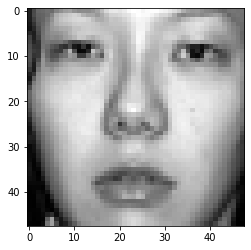

In [ ]:
ix = 10;

plt.figure(ix)
plt.imshow(X_train[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [ ]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_data("/content/toronto_face/toronto_face.npz")

From now implement my model.


# **Fully connected model**
3374 data-features: 2304 . model gets learning rate and optimizer as input; then compile it

In [ ]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_data("/content/toronto_face/toronto_face.npz")

def create_model(lr,my_optimiezr):
  print(X_train.shape)
  print(Y_train.shape)
  input_layer=keras.layers.Input(shape=(X_train.shape[1]),name="input_layer")
  model=keras.models.Sequential([input_layer,
                                keras.layers.Dense(2000,activation="relu"),
                                keras.layers.Dense(7,activation="sigmoid",name="out_layer")
                                ]

                                )
  model.compile(optimizer=my_optimiezr(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
  return model

model=create_model(lr=0.00001,my_optimiezr=keras.optimizers.Adam)

(3374, 2304)
(3374, 7)


# **model architecture**

In [ ]:
model.summary()
#keras.utils.plot_model(model)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              4610000   
_________________________________________________________________
out_layer (Dense)            (None, 7)                 14007     
Total params: 4,624,007
Trainable params: 4,624,007
Non-trainable params: 0
_________________________________________________________________


# **fit model**

In [ ]:
def fit_model(model,epochs_size,batchs_size):

  model_history=model.fit(X_train, Y_train, batch_size=batchs_size, epochs=epochs_size, shuffle=True,validation_data=(X_valid, Y_valid))
  return model_history

In [ ]:
epochs_size=300
model_history=fit_model(model,epochs_size=300,batchs_size=100)

Epoch 1/300
34/34 [==============================] - 16s 18ms/step - loss: 1.8951 - accuracy: 0.2411 - val_loss: 1.7996 - val_accuracy: 0.2840
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 1.7692 - accuracy: 0.3098 - val_loss: 1.7252 - val_accuracy: 0.3532
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 1.7137 - accuracy: 0.3704 - val_loss: 1.6807 - val_accuracy: 0.3675
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 1.6685 - accuracy: 0.4107 - val_loss: 1.6324 - val_accuracy: 0.4057
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 1.6210 - accuracy: 0.4213 - val_loss: 1.6033 - val_accuracy: 0.5012
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 1.5748 - accuracy: 0.4865 - val_loss: 1.5577 - val_accuracy: 0.4845
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 1.5640 - accuracy: 0.4771 - val_loss: 1.5321 - val_accuracy: 0.5155
Epoch 8/300

# ***plot model accuracy and loss***

In [ ]:
def plot_model_acc_loss(model_history,epochs_size,title):

  acc = model_history.history['accuracy']
  val_acc = model_history.history['val_accuracy']
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  plt.figure(figsize=(15, 15))
  plt.subplot(2, 2, 1)
  plt.plot(range(epochs_size), acc, label='Training Accuracy')
  plt.plot(range(epochs_size), val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy '+title)

  plt.subplot(2, 2, 2)
  plt.plot(range(epochs_size), loss, label='Training Loss')
  plt.plot(range(epochs_size), val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss '+title)
  plt.show()

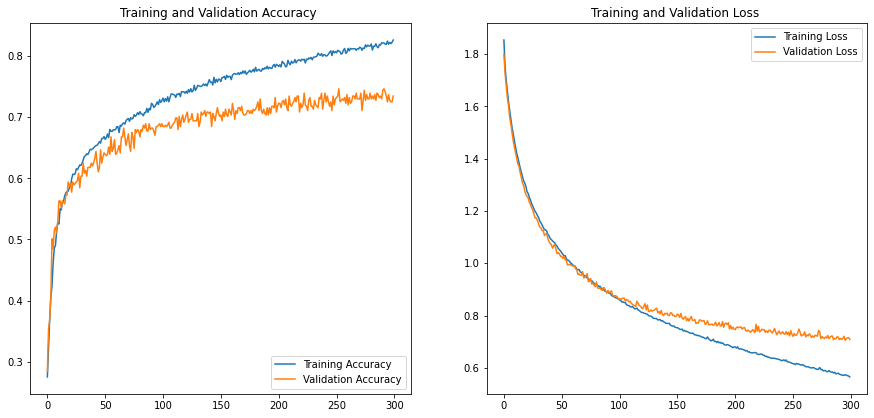

In [ ]:
plot_model_acc_loss(model_history,epochs_size,"")

we can see overfitting and high variance since train is very higher than vaidation. so change learning rate and used drop out for the layer


# **test model**

In [ ]:
def test_model(model):

  print('--------test------')
  Y_pred = (model.predict(X_test) > 0.5).astype("int32")
  return Y_pred


In [ ]:
Y_pred=test_model(model)

--------test------


# **Test measures(Accuracy,Precision,Recall,F1 Measure)**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def test_measures(Y_pred,title):

  classfi_report=classification_report(Y_test, Y_pred,output_dict=True)

  acc=accuracy_score(Y_test, Y_pred)
  precision= classfi_report['macro avg']['precision']
  recall= classfi_report['macro avg']['recall']
  f1_measure= classfi_report['macro avg']['f1-score']

  measures=["Accuracy","Precision","Recall","F1 Measure"]
  results=[acc,precision,recall,f1_measure]
  fig=plt.figure(figsize=(8,6))
  plt.bar(measures, results,color = ['red', 'green'])
  plt.xticks(measures )
  plt.ylabel('percent%')
  plt.title('measurements of network '+title)
  plt.xlabel("measurement")
  for i, v in enumerate(results):
      v=round(v,2)
      plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
  fig.show()



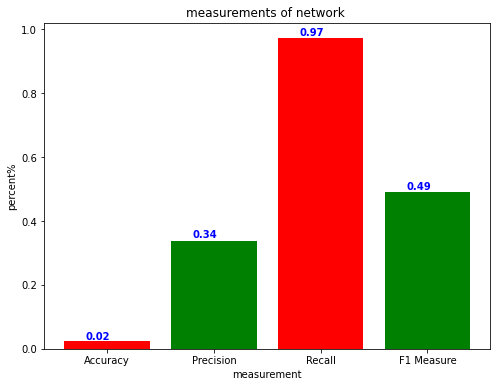

In [ ]:
test_measures(Y_pred,"")

# **Adding Dropout to avoid overfitting problem**

In [ ]:
def create_model_droupout(lr,my_optimiezr):
  print(X_train.shape)
  print(Y_train.shape)
  input_layer=keras.layers.Input(shape=(X_train.shape[1]),name="input_layer")
  model=keras.models.Sequential([input_layer,
                                keras.layers.Dense(2000,activation="relu",name="dense11"),
                                keras.layers.Dropout(0.3),
                                keras.layers.Dense(7,activation="softmax",name="out_layer")
                                ]

                                )
  model.compile(optimizer=my_optimiezr(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
  return model

model=create_model(lr=0.00001,my_optimiezr=keras.optimizers.Adam)

(3374, 2304)
(3374, 7)


(3374, 2304)
(3374, 7)
Epoch 1/300
34/34 [==============================] - 2s 25ms/step - loss: 1.9307 - accuracy: 0.1982 - val_loss: 1.8569 - val_accuracy: 0.2792
Epoch 2/300
34/34 [==============================] - 0s 9ms/step - loss: 1.8496 - accuracy: 0.2904 - val_loss: 1.8443 - val_accuracy: 0.2792
Epoch 3/300
34/34 [==============================] - 0s 9ms/step - loss: 1.8543 - accuracy: 0.2816 - val_loss: 1.8382 - val_accuracy: 0.2792
Epoch 4/300
34/34 [==============================] - 0s 8ms/step - loss: 1.8620 - accuracy: 0.2706 - val_loss: 1.8298 - val_accuracy: 0.2792
Epoch 5/300
34/34 [==============================] - 0s 8ms/step - loss: 1.8427 - accuracy: 0.2973 - val_loss: 1.8238 - val_accuracy: 0.2792
Epoch 6/300
34/34 [==============================] - 0s 8ms/step - loss: 1.8453 - accuracy: 0.2814 - val_loss: 1.8136 - val_accuracy: 0.2792
Epoch 7/300
34/34 [==============================] - 0s 8ms/step - loss: 1.8363 - accuracy: 0.2872 - val_loss: 1.8007 - val_accura

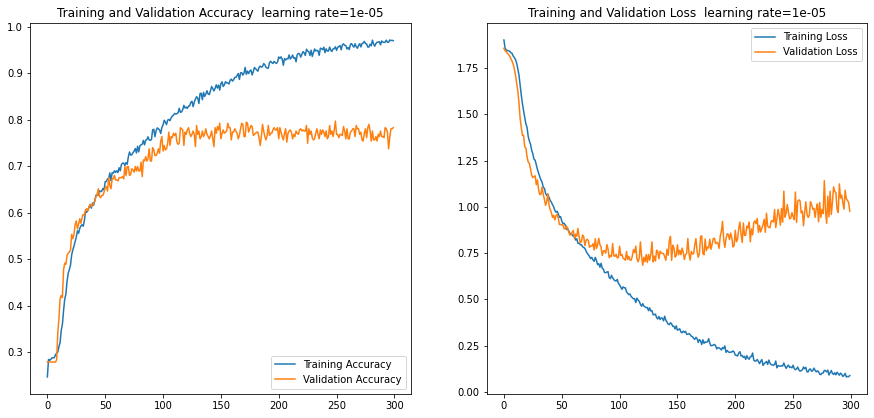

--------test------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


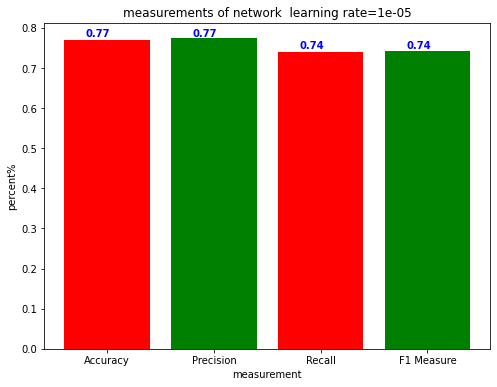

In [ ]:
lrs=0.00001
epochs_size=300
model=create_model_droupout(lr=0.00001,my_optimiezr=keras.optimizers.Adam)
model_history=fit_model(model,epochs_size,batchs_size=100)
plot_model_acc_loss(model_history,epochs_size,title=" learning rate="+ str(lrs))
Y_pred=test_model(model)
test_measures(Y_pred,title=" learning rate="+str(lrs))

dropout can decrease overfit


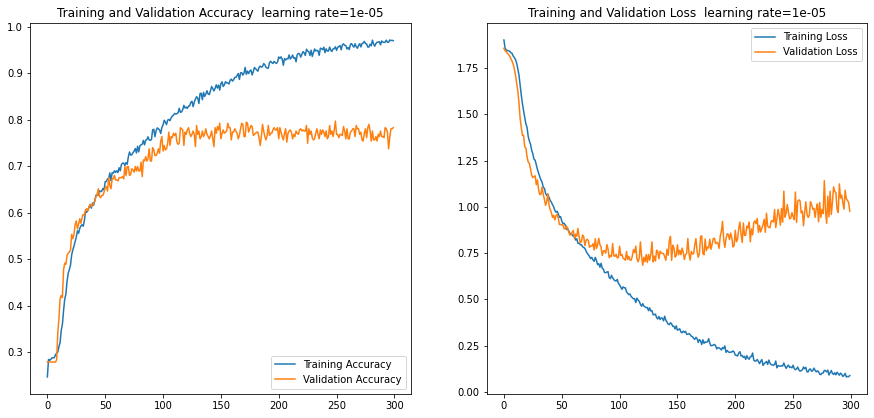

--------test------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


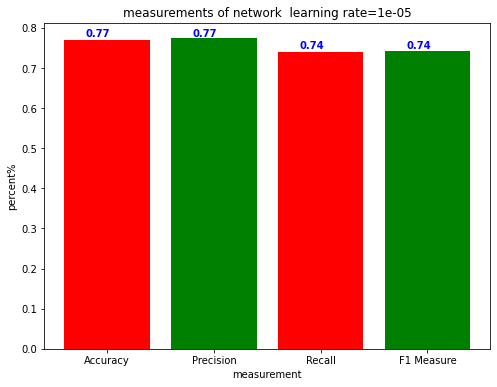

In [ ]:
plot_model_acc_loss(model_history,epochs_size,title=" learning rate="+ str(lrs))
Y_pred=test_model(model)
test_measures(Y_pred,title=" learning rate="+str(lrs))

# **checking model with different learning rate**

(3374, 2304)
(3374, 7)
Epoch 1/300
34/34 [==============================] - 1s 12ms/step - loss: 5.0983 - accuracy: 0.1883 - val_loss: 1.7389 - val_accuracy: 0.4988
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 1.6635 - accuracy: 0.4217 - val_loss: 1.5361 - val_accuracy: 0.4654
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 1.4558 - accuracy: 0.5004 - val_loss: 1.4620 - val_accuracy: 0.4582
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 1.3943 - accuracy: 0.5013 - val_loss: 1.2941 - val_accuracy: 0.5370
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 1.2964 - accuracy: 0.5538 - val_loss: 1.1470 - val_accuracy: 0.6014
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 1.1648 - accuracy: 0.6186 - val_loss: 1.1964 - val_accuracy: 0.5823
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 1.1579 - accuracy: 0.6080 - val_loss: 1.0711 - val_accura

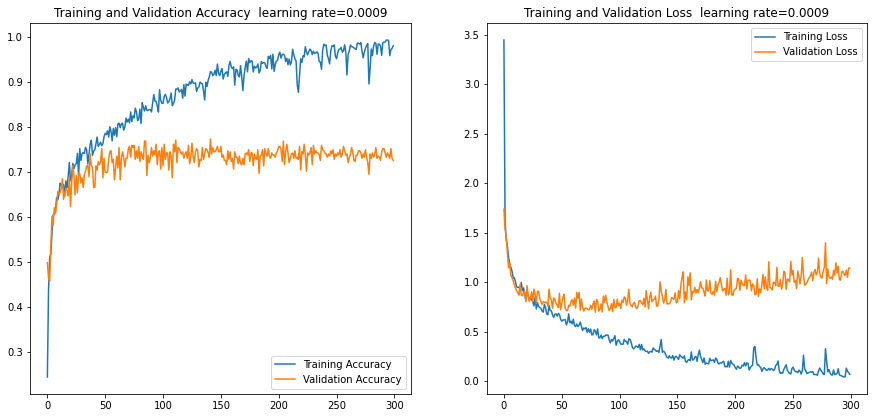

--------test------
(3374, 2304)
(3374, 7)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/300
34/34 [==============================] - 1s 12ms/step - loss: 48.7001 - accuracy: 0.1661 - val_loss: 1.8800 - val_accuracy: 0.2792
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 1.8396 - accuracy: 0.2912 - val_loss: 1.7131 - val_accuracy: 0.3938
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 1.6766 - accuracy: 0.4045 - val_loss: 1.5573 - val_accuracy: 0.4749
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 1.5383 - accuracy: 0.4724 - val_loss: 1.4005 - val_accuracy: 0.5274
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 1.4158 - accuracy: 0.5019 - val_loss: 1.2801 - val_accuracy: 0.5537
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 1.2743 - accuracy: 0.5497 - val_loss: 1.1930 - val_accuracy: 0.5609
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 1.2049 - accuracy: 0.5636 - val_loss: 1.3704 - val_accuracy: 0.5418
Epoch 8/300

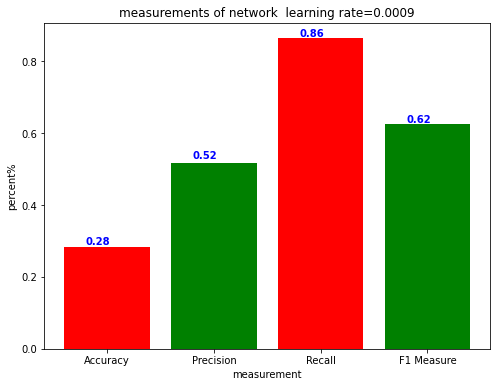

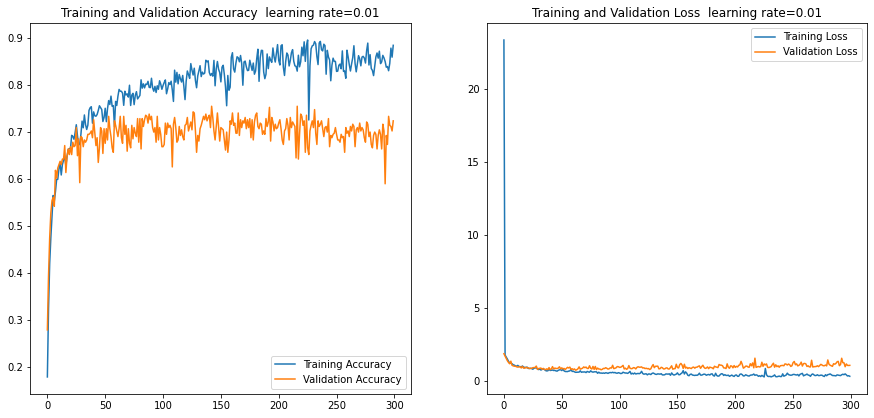

--------test------
(3374, 2304)
(3374, 7)
Epoch 1/300
34/34 [==============================] - 1s 12ms/step - loss: 1376.4572 - accuracy: 0.1657 - val_loss: 1.8766 - val_accuracy: 0.2792
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 2.0387 - accuracy: 0.2726 - val_loss: 1.8666 - val_accuracy: 0.2792
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8534 - accuracy: 0.2931 - val_loss: 1.8600 - val_accuracy: 0.2792
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8735 - accuracy: 0.2765 - val_loss: 1.8588 - val_accuracy: 0.2792
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8657 - accuracy: 0.2821 - val_loss: 1.8598 - val_accuracy: 0.2792
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8679 - accuracy: 0.2729 - val_loss: 1.8595 - val_accuracy: 0.2792
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8657 - accuracy: 0.2861 - val_los

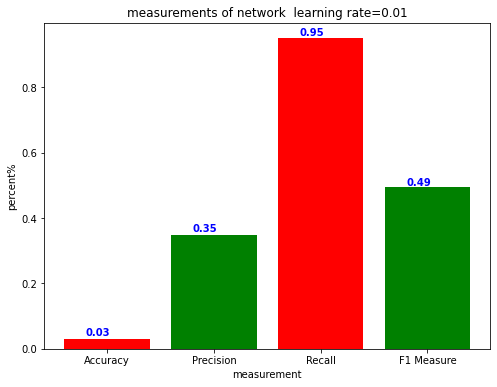

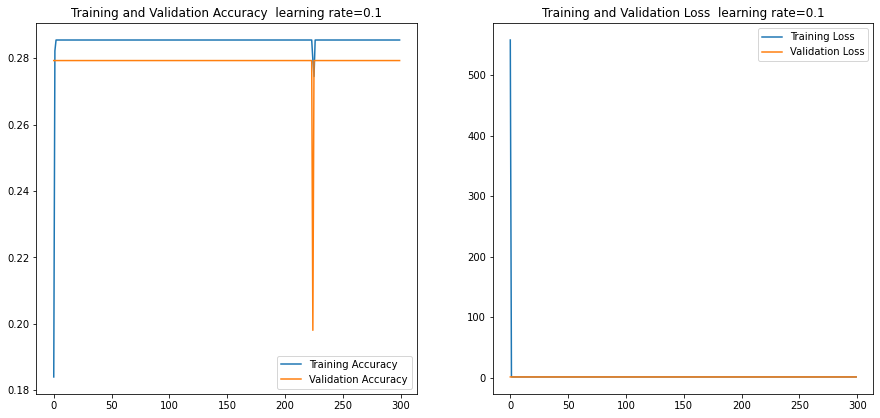

--------test------
(3374, 2304)
(3374, 7)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/300
34/34 [==============================] - 1s 12ms/step - loss: 29580.1698 - accuracy: 0.1473 - val_loss: 2.5907 - val_accuracy: 0.2792
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 12.1369 - accuracy: 0.2590 - val_loss: 1.9526 - val_accuracy: 0.2792
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9487 - accuracy: 0.2701 - val_loss: 1.8687 - val_accuracy: 0.2792
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 1.8638 - accuracy: 0.2904 - val_loss: 1.8609 - val_accuracy: 0.2792
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8621 - accuracy: 0.2866 - val_loss: 1.8721 - val_accuracy: 0.2792
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 1.8711 - accuracy: 0.2831 - val_loss: 1.8621 - val_accuracy: 0.2792
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8479 - accuracy: 0.3003 - val_loss: 1.8736 - val_accuracy: 0.2792
Epoch 8

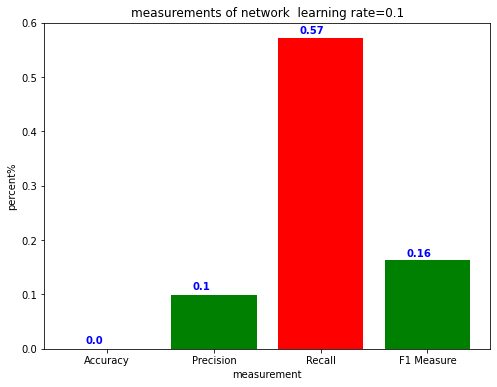

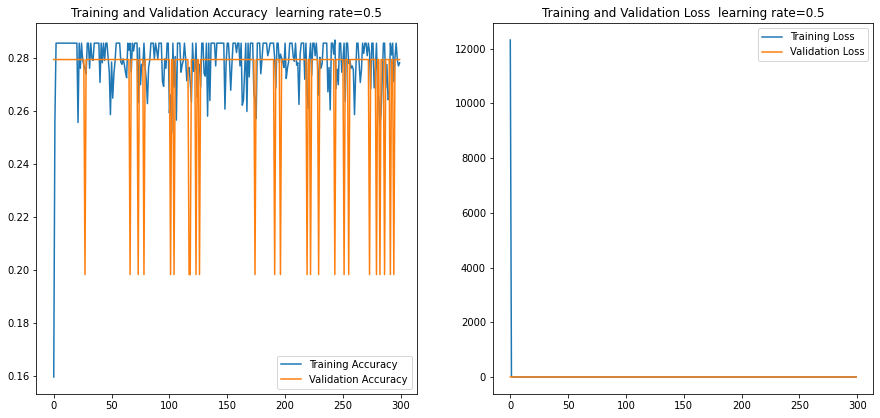

--------test------
(3374, 2304)
(3374, 7)
Epoch 1/300
34/34 [==============================] - 1s 12ms/step - loss: 171455.2868 - accuracy: 0.1722 - val_loss: 353.9687 - val_accuracy: 0.1002
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 85.3476 - accuracy: 0.2373 - val_loss: 1.9097 - val_accuracy: 0.1981
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9637 - accuracy: 0.2481 - val_loss: 1.8720 - val_accuracy: 0.2792
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8786 - accuracy: 0.2843 - val_loss: 1.8881 - val_accuracy: 0.2792
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8872 - accuracy: 0.2820 - val_loss: 1.8748 - val_accuracy: 0.2792
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8685 - accuracy: 0.2929 - val_loss: 1.8889 - val_accuracy: 0.1981
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8825 - accuracy: 0.2503 - va

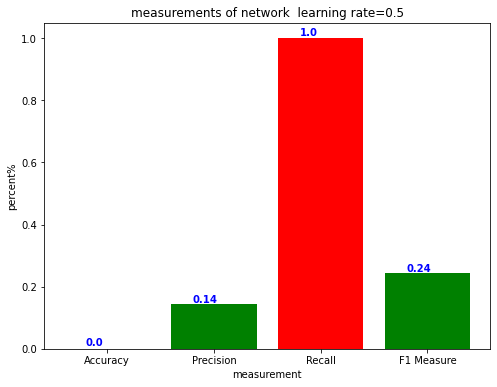

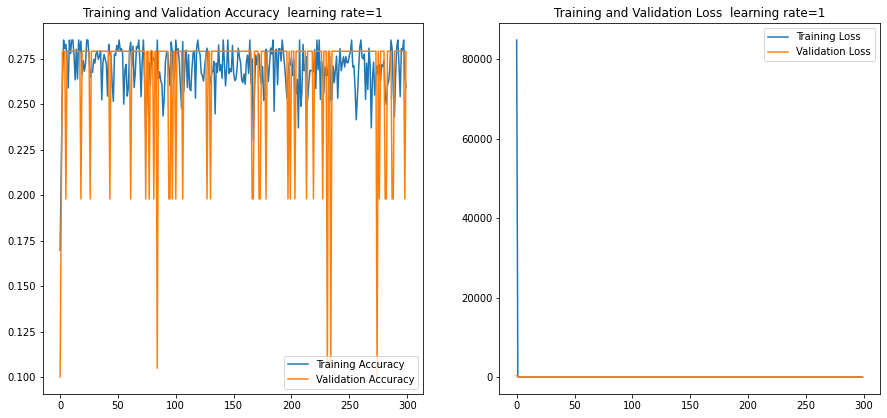

--------test------


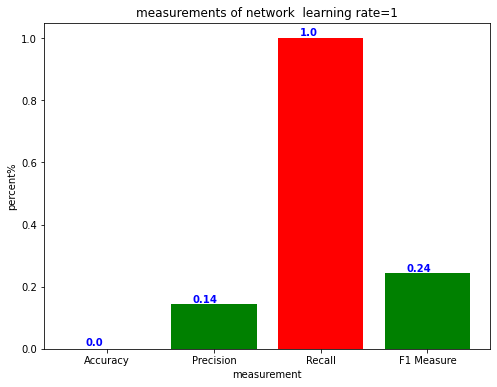

In [ ]:
learning_rates=[0.0009,0.01,0.1,0.5,1]
epochs_size=300
for lrs in learning_rates:
  model=create_model(lr=lrs,my_optimiezr=keras.optimizers.Adam)
  model_history=fit_model(model,epochs_size,batchs_size=100)
  plot_model_acc_loss(model_history,epochs_size,title=" learning rate="+ str(lrs))
  Y_pred=test_model(model)
  test_measures(Y_pred,title=" learning rate="+str(lrs))

# **checking model with different batch size**

(3374, 2304)
(3374, 7)
Epoch 1/300
338/338 [==============================] - 2s 4ms/step - loss: 1.8471 - accuracy: 0.2954 - val_loss: 1.6554 - val_accuracy: 0.4606
Epoch 2/300
338/338 [==============================] - 1s 4ms/step - loss: 1.6239 - accuracy: 0.4336 - val_loss: 1.5669 - val_accuracy: 0.4153
Epoch 3/300
338/338 [==============================] - 1s 4ms/step - loss: 1.5214 - accuracy: 0.4910 - val_loss: 1.4190 - val_accuracy: 0.5442
Epoch 4/300
338/338 [==============================] - 1s 4ms/step - loss: 1.4297 - accuracy: 0.5305 - val_loss: 1.3659 - val_accuracy: 0.5585
Epoch 5/300
338/338 [==============================] - 1s 4ms/step - loss: 1.3436 - accuracy: 0.5806 - val_loss: 1.3133 - val_accuracy: 0.5728
Epoch 6/300
338/338 [==============================] - 1s 4ms/step - loss: 1.3200 - accuracy: 0.5555 - val_loss: 1.2606 - val_accuracy: 0.5704
Epoch 7/300
338/338 [==============================] - 1s 4ms/step - loss: 1.2733 - accuracy: 0.5949 - val_loss: 1.2309

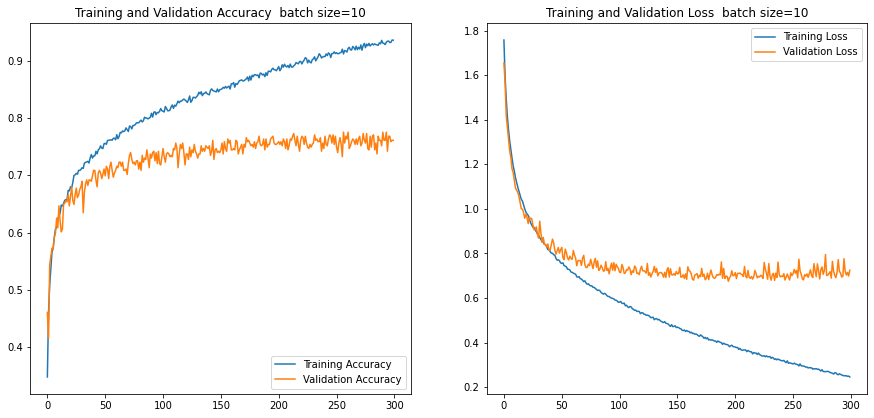

--------test------
(3374, 2304)
(3374, 7)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/300
68/68 [==============================] - 1s 7ms/step - loss: 1.8878 - accuracy: 0.2605 - val_loss: 1.7409 - val_accuracy: 0.3007
Epoch 2/300
68/68 [==============================] - 0s 4ms/step - loss: 1.7314 - accuracy: 0.3258 - val_loss: 1.6719 - val_accuracy: 0.3270
Epoch 3/300
68/68 [==============================] - 0s 4ms/step - loss: 1.6457 - accuracy: 0.3827 - val_loss: 1.6040 - val_accuracy: 0.4726
Epoch 4/300
68/68 [==============================] - 0s 4ms/step - loss: 1.6112 - accuracy: 0.4203 - val_loss: 1.5479 - val_accuracy: 0.5155
Epoch 5/300
68/68 [==============================] - 0s 4ms/step - loss: 1.5482 - accuracy: 0.4865 - val_loss: 1.5236 - val_accuracy: 0.4487
Epoch 6/300
68/68 [==============================] - 0s 5ms/step - loss: 1.5052 - accuracy: 0.5023 - val_loss: 1.4615 - val_accuracy: 0.5442
Epoch 7/300
68/68 [==============================] - 0s 5ms/step - loss: 1.4653 - accuracy: 0.5208 - val_loss: 1.4323 - val_accuracy: 0.5561
Epoch 8/300
6

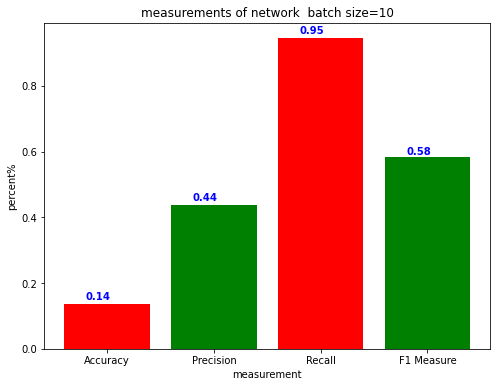

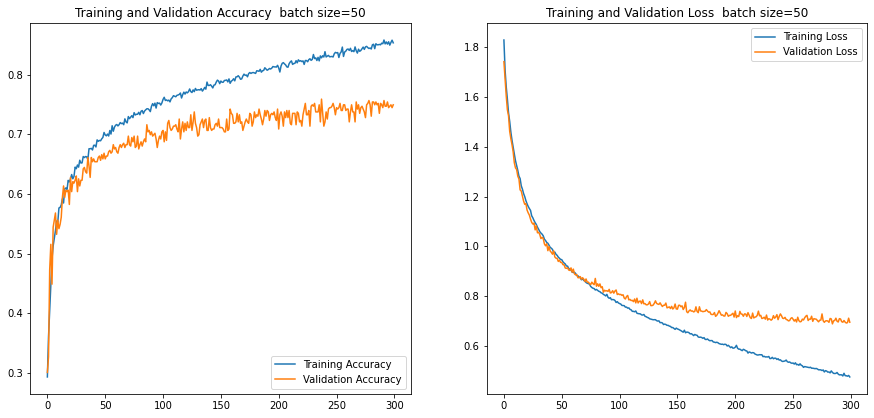

--------test------
(3374, 2304)
(3374, 7)
Epoch 1/300
14/14 [==============================] - 1s 24ms/step - loss: 1.8640 - accuracy: 0.2907 - val_loss: 1.8207 - val_accuracy: 0.2888
Epoch 2/300
14/14 [==============================] - 0s 8ms/step - loss: 1.8004 - accuracy: 0.2888 - val_loss: 1.7627 - val_accuracy: 0.3055
Epoch 3/300
14/14 [==============================] - 0s 8ms/step - loss: 1.7539 - accuracy: 0.3103 - val_loss: 1.7190 - val_accuracy: 0.3246
Epoch 4/300
14/14 [==============================] - 0s 8ms/step - loss: 1.7094 - accuracy: 0.3480 - val_loss: 1.6853 - val_accuracy: 0.3938
Epoch 5/300
14/14 [==============================] - 0s 8ms/step - loss: 1.6870 - accuracy: 0.3817 - val_loss: 1.6587 - val_accuracy: 0.4606
Epoch 6/300
14/14 [==============================] - 0s 8ms/step - loss: 1.6535 - accuracy: 0.4141 - val_loss: 1.6335 - val_accuracy: 0.4582
Epoch 7/300
14/14 [==============================] - 0s 8ms/step - loss: 1.6464 - accuracy: 0.4135 - val_loss: 

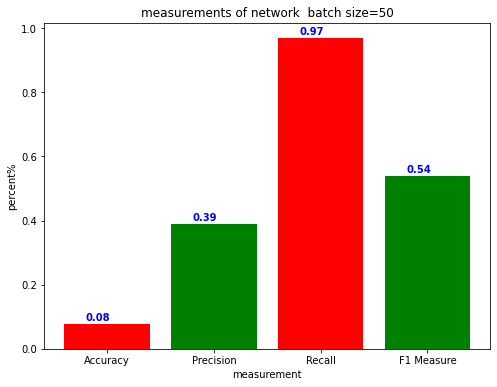

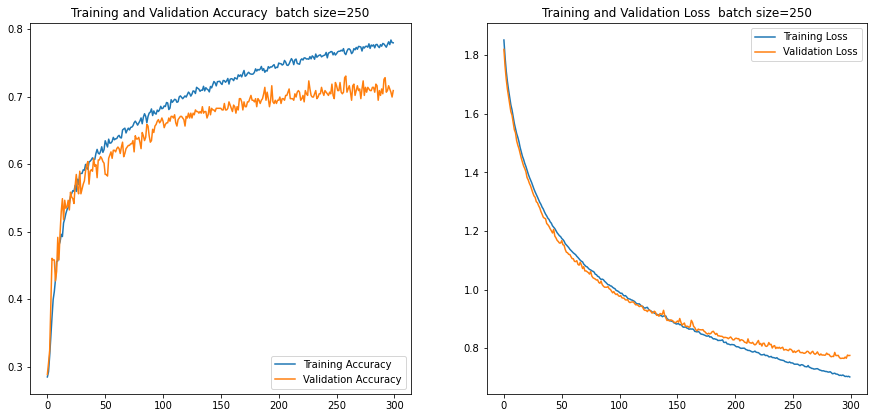

--------test------
(3374, 2304)
(3374, 7)
Epoch 1/300
7/7 [==============================] - 1s 47ms/step - loss: 1.9587 - accuracy: 0.2025 - val_loss: 1.8471 - val_accuracy: 0.2792
Epoch 2/300
7/7 [==============================] - 0s 13ms/step - loss: 1.8206 - accuracy: 0.2953 - val_loss: 1.8355 - val_accuracy: 0.2912
Epoch 3/300
7/7 [==============================] - 0s 14ms/step - loss: 1.8027 - accuracy: 0.3043 - val_loss: 1.7936 - val_accuracy: 0.2888
Epoch 4/300
7/7 [==============================] - 0s 13ms/step - loss: 1.7742 - accuracy: 0.3019 - val_loss: 1.7654 - val_accuracy: 0.3150
Epoch 5/300
7/7 [==============================] - 0s 15ms/step - loss: 1.7632 - accuracy: 0.3098 - val_loss: 1.7421 - val_accuracy: 0.3222
Epoch 6/300
7/7 [==============================] - 0s 13ms/step - loss: 1.7271 - accuracy: 0.3301 - val_loss: 1.7217 - val_accuracy: 0.3413
Epoch 7/300
7/7 [==============================] - 0s 13ms/step - loss: 1.7077 - accuracy: 0.3488 - val_loss: 1.7029 -

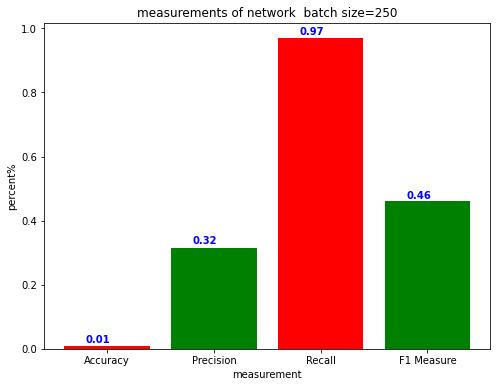

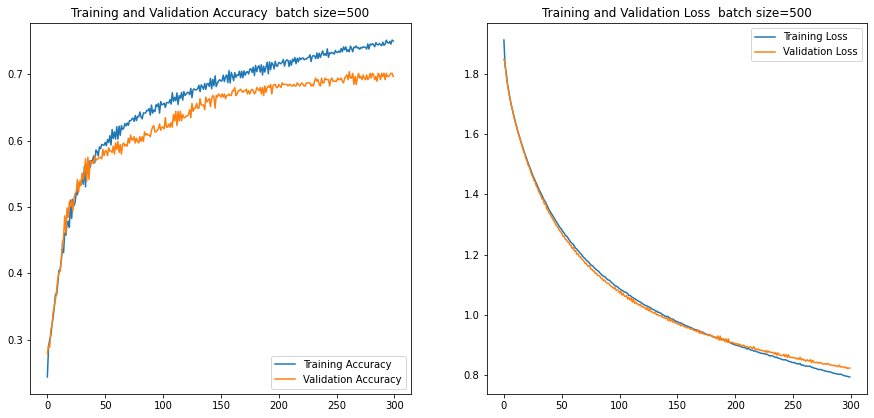

--------test------
(3374, 2304)
(3374, 7)
Epoch 1/300
4/4 [==============================] - 1s 99ms/step - loss: 1.9392 - accuracy: 0.1751 - val_loss: 1.8616 - val_accuracy: 0.2792
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 1.8474 - accuracy: 0.2828 - val_loss: 1.8533 - val_accuracy: 0.2792
Epoch 3/300
4/4 [==============================] - 0s 20ms/step - loss: 1.8441 - accuracy: 0.2851 - val_loss: 1.8283 - val_accuracy: 0.2936
Epoch 4/300
4/4 [==============================] - 0s 22ms/step - loss: 1.8185 - accuracy: 0.3060 - val_loss: 1.8098 - val_accuracy: 0.2983
Epoch 5/300
4/4 [==============================] - 0s 20ms/step - loss: 1.7941 - accuracy: 0.3040 - val_loss: 1.8014 - val_accuracy: 0.2912
Epoch 6/300
4/4 [==============================] - 0s 22ms/step - loss: 1.7841 - accuracy: 0.2919 - val_loss: 1.7886 - val_accuracy: 0.2936
Epoch 7/300
4/4 [==============================] - 0s 20ms/step - loss: 1.7641 - accuracy: 0.3046 - val_loss: 1.7702 -

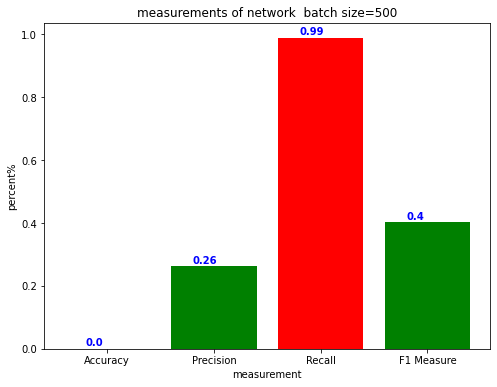

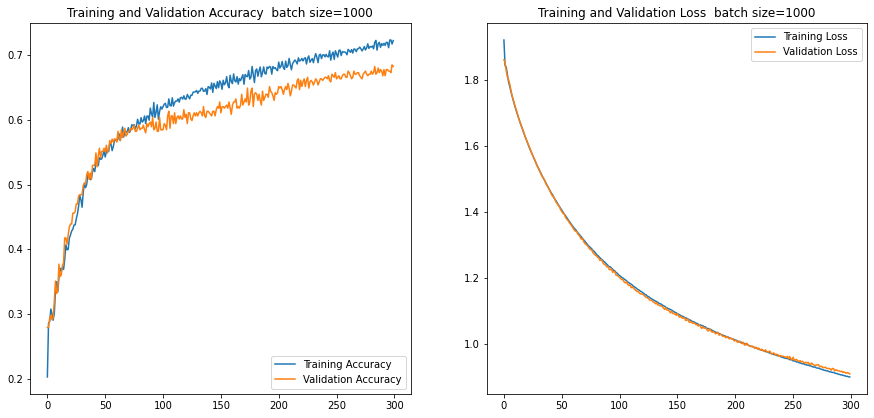

--------test------


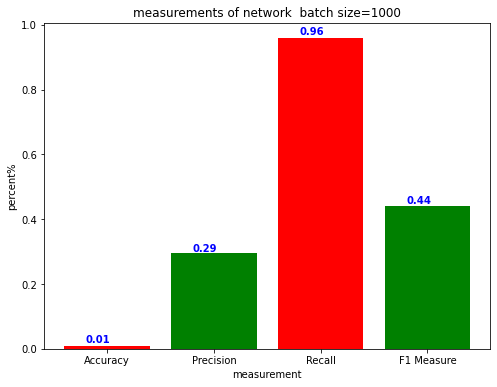

In [ ]:
lrs=0.00001
batch=[10,50,250,500,1000]
epochs_size=300
for btch in batch:
  model=create_model(lr=lrs,my_optimiezr=keras.optimizers.Adam)
  model_history=fit_model(model,epochs_size,batchs_size=btch)
  plot_model_acc_loss(model_history,epochs_size,title=" batch size="+ str(btch))
  Y_pred=test_model(model)
  test_measures(Y_pred,title=" batch size="+str(btch))

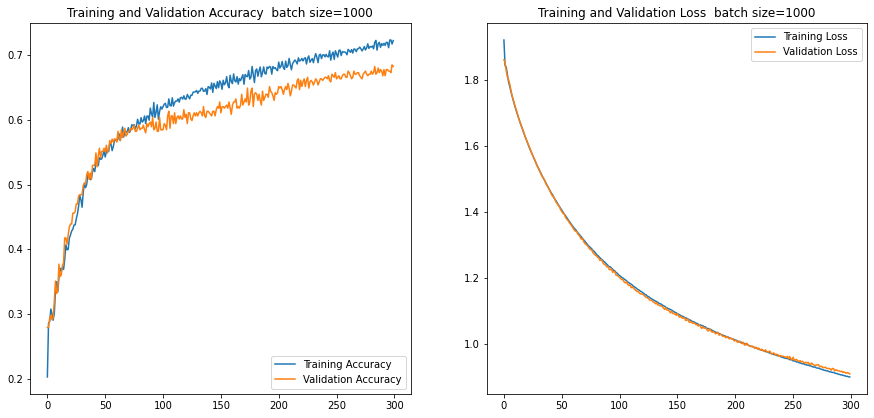

--------test------


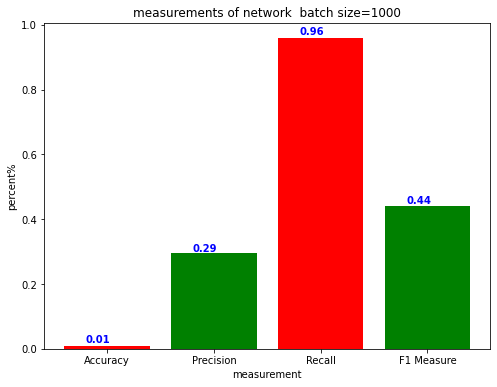

In [ ]:
plot_model_acc_loss(model_history,epochs_size,title=" batch size="+ str(btch))
Y_pred=test_model(model)
test_measures(Y_pred,title=" batch size="+str(btch))

# **checking model with different neorouns and a layer**

(3374, 2304)
(3374, 7)
Epoch 1/300
338/338 [==============================] - 2s 4ms/step - loss: 1.8370 - accuracy: 0.3044 - val_loss: 1.7105 - val_accuracy: 0.3031
Epoch 2/300
338/338 [==============================] - 1s 3ms/step - loss: 1.6817 - accuracy: 0.3923 - val_loss: 1.5881 - val_accuracy: 0.3866
Epoch 3/300
338/338 [==============================] - 1s 3ms/step - loss: 1.5611 - accuracy: 0.4724 - val_loss: 1.5125 - val_accuracy: 0.5036
Epoch 4/300
338/338 [==============================] - 1s 3ms/step - loss: 1.4998 - accuracy: 0.5045 - val_loss: 1.4376 - val_accuracy: 0.5680
Epoch 5/300
338/338 [==============================] - 1s 3ms/step - loss: 1.4620 - accuracy: 0.5168 - val_loss: 1.4010 - val_accuracy: 0.5155
Epoch 6/300
338/338 [==============================] - 1s 3ms/step - loss: 1.4111 - accuracy: 0.5385 - val_loss: 1.3429 - val_accuracy: 0.5513
Epoch 7/300
338/338 [==============================] - 1s 3ms/step - loss: 1.3514 - accuracy: 0.5628 - val_loss: 1.2977

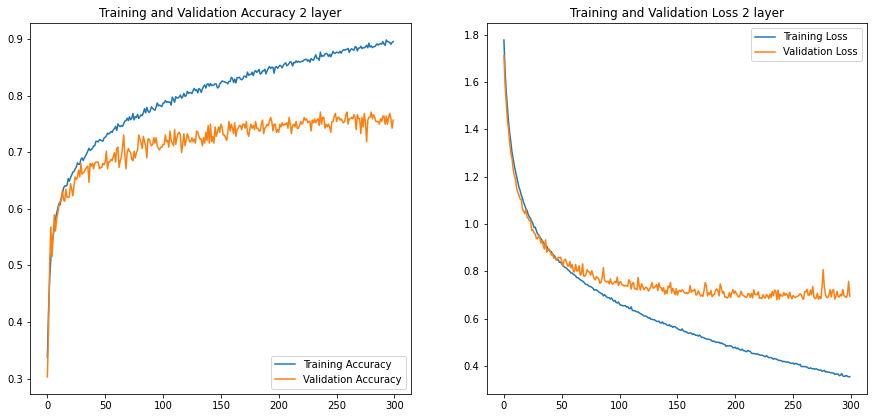

--------test------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


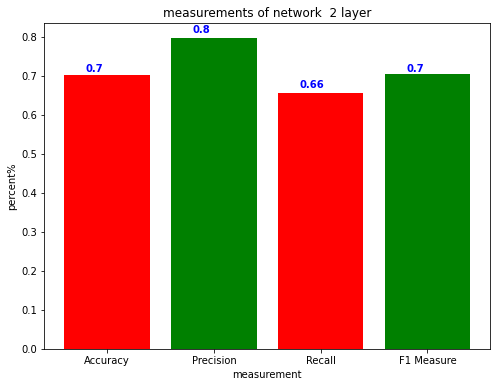

In [ ]:
 def create_model(lr,my_optimiezr):
  print(X_train.shape)
  print(Y_train.shape)
  input_layer=keras.layers.Input(shape=(X_train.shape[1]),name="input_layer")
  model=keras.models.Sequential([input_layer,
                                keras.layers.Dense(1000,activation="relu",name="dense1"),
                                keras.layers.Dense(7,activation="softmax",name="out_layer")
                                ]

                                )
  model.compile(optimizer=my_optimiezr(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
  return model

model=create_model(lr=0.00001,my_optimiezr=keras.optimizers.Adam)
model_history=fit_model(model,epochs_size,batchs_size=btch)
plot_model_acc_loss(model_history,epochs_size,title="1 layer" )
Y_pred=test_model(model)
test_measures(Y_pred,title=" 1 layer")

(3374, 2304)
(3374, 7)
Epoch 1/300
338/338 [==============================] - 2s 5ms/step - loss: 1.8005 - accuracy: 0.3143 - val_loss: 1.5549 - val_accuracy: 0.4630
Epoch 2/300
338/338 [==============================] - 1s 4ms/step - loss: 1.5305 - accuracy: 0.4748 - val_loss: 1.3640 - val_accuracy: 0.5465
Epoch 3/300
338/338 [==============================] - 1s 4ms/step - loss: 1.3970 - accuracy: 0.5374 - val_loss: 1.2607 - val_accuracy: 0.6086
Epoch 4/300
338/338 [==============================] - 1s 4ms/step - loss: 1.2501 - accuracy: 0.5870 - val_loss: 1.2011 - val_accuracy: 0.5489
Epoch 5/300
338/338 [==============================] - 1s 4ms/step - loss: 1.1695 - accuracy: 0.6077 - val_loss: 1.1078 - val_accuracy: 0.6110
Epoch 6/300
338/338 [==============================] - 1s 4ms/step - loss: 1.0965 - accuracy: 0.6313 - val_loss: 1.1219 - val_accuracy: 0.6086
Epoch 7/300
338/338 [==============================] - 1s 4ms/step - loss: 1.0772 - accuracy: 0.6354 - val_loss: 1.0405

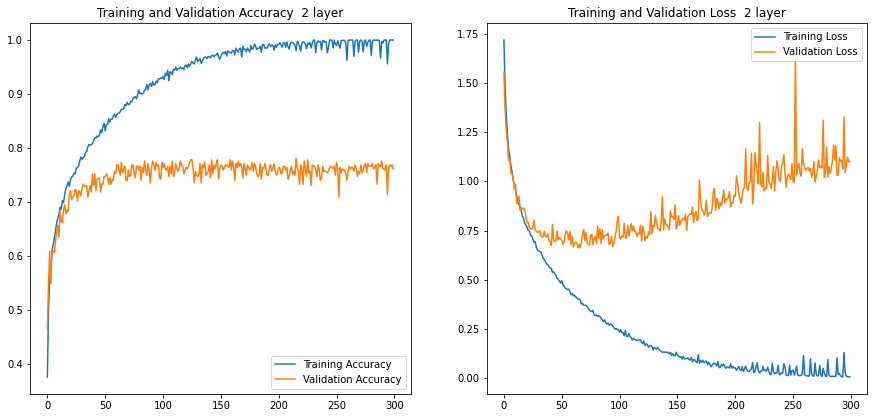

--------test------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


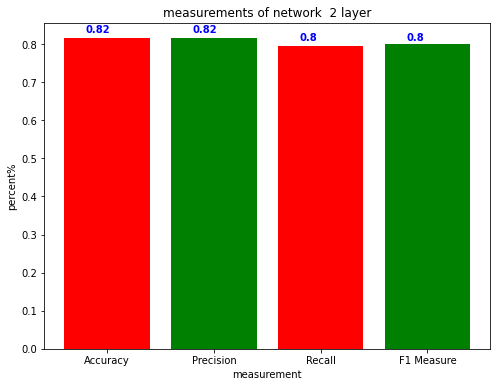

In [ ]:
 btch=10  # set batch size
 def create_model(lr,my_optimiezr):
  print(X_train.shape)
  print(Y_train.shape)
  input_layer=keras.layers.Input(shape=(X_train.shape[1]),name="input_layer")
  model=keras.models.Sequential([input_layer,
                                keras.layers.Dense(2000,activation="relu",name="dense1"),
                                keras.layers.Dense(1500,activation="relu",name="dense2"),
                                keras.layers.Dense(7,activation="softmax",name="out_layer")
                                ]

                                )
  model.compile(optimizer=my_optimiezr(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
  return model

model=create_model(lr=0.00001,my_optimiezr=keras.optimizers.Adam)
model_history=fit_model(model,epochs_size,batchs_size=btch)
plot_model_acc_loss(model_history,epochs_size,title=" 2 layer" )
Y_pred=test_model(model)
test_measures(Y_pred,title=" 2 layer")

# **checking model with different optimizer algorithms**

(3374, 2304)
(3374, 7)
Epoch 1/300
338/338 [==============================] - 2s 4ms/step - loss: 1.8255 - accuracy: 0.2926 - val_loss: 1.6892 - val_accuracy: 0.4272
Epoch 2/300
338/338 [==============================] - 1s 3ms/step - loss: 1.6662 - accuracy: 0.4002 - val_loss: 1.5935 - val_accuracy: 0.4391
Epoch 3/300
338/338 [==============================] - 1s 3ms/step - loss: 1.5894 - accuracy: 0.4494 - val_loss: 1.5457 - val_accuracy: 0.4678
Epoch 4/300
338/338 [==============================] - 1s 3ms/step - loss: 1.5175 - accuracy: 0.4968 - val_loss: 1.4702 - val_accuracy: 0.4869
Epoch 5/300
338/338 [==============================] - 1s 3ms/step - loss: 1.4692 - accuracy: 0.5122 - val_loss: 1.3868 - val_accuracy: 0.5561
Epoch 6/300
338/338 [==============================] - 1s 3ms/step - loss: 1.4345 - accuracy: 0.5198 - val_loss: 1.3987 - val_accuracy: 0.4797
Epoch 7/300
338/338 [==============================] - 1s 3ms/step - loss: 1.3751 - accuracy: 0.5418 - val_loss: 1.3226

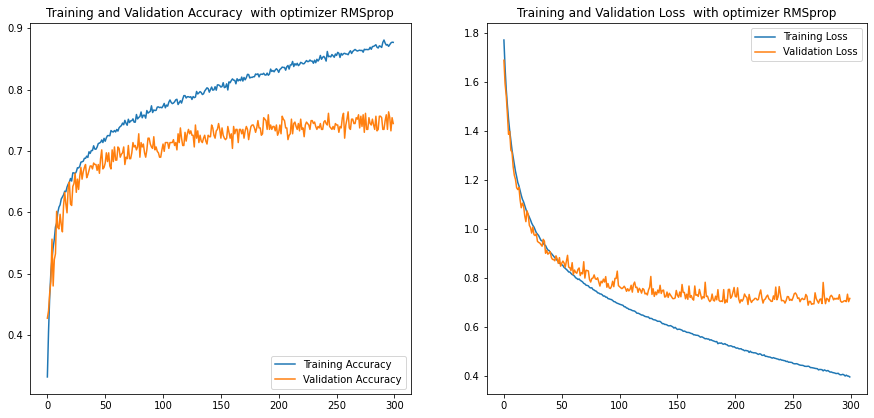

--------test------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


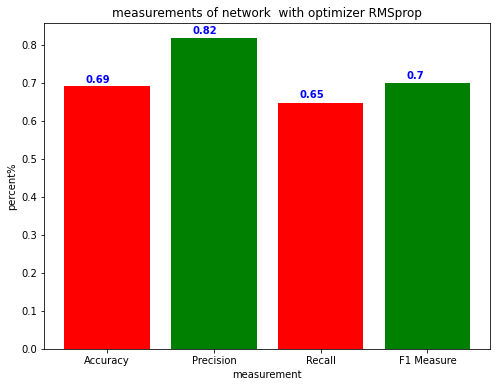

In [ ]:
model=create_model(lr=0.00001,my_optimiezr=keras.optimizers.RMSprop)
model_history=fit_model(model,epochs_size,batchs_size=btch)
plot_model_acc_loss(model_history,epochs_size,title=" with optimizer RMSprop")
Y_pred=test_model(model)
test_measures(Y_pred,title=" with optimizer RMSprop" )

(3374, 2304)
(3374, 7)
Epoch 1/300
338/338 [==============================] - 2s 3ms/step - loss: 1.9232 - accuracy: 0.1338 - val_loss: 1.8987 - val_accuracy: 0.2792
Epoch 2/300
338/338 [==============================] - 1s 3ms/step - loss: 1.8977 - accuracy: 0.2723 - val_loss: 1.8752 - val_accuracy: 0.2912
Epoch 3/300
338/338 [==============================] - 1s 3ms/step - loss: 1.8565 - accuracy: 0.2991 - val_loss: 1.8641 - val_accuracy: 0.2888
Epoch 4/300
338/338 [==============================] - 1s 3ms/step - loss: 1.8701 - accuracy: 0.2817 - val_loss: 1.8573 - val_accuracy: 0.2888
Epoch 5/300
338/338 [==============================] - 1s 3ms/step - loss: 1.8525 - accuracy: 0.2932 - val_loss: 1.8528 - val_accuracy: 0.2888
Epoch 6/300
338/338 [==============================] - 1s 3ms/step - loss: 1.8600 - accuracy: 0.2786 - val_loss: 1.8493 - val_accuracy: 0.2864
Epoch 7/300
338/338 [==============================] - 1s 3ms/step - loss: 1.8411 - accuracy: 0.2974 - val_loss: 1.8464

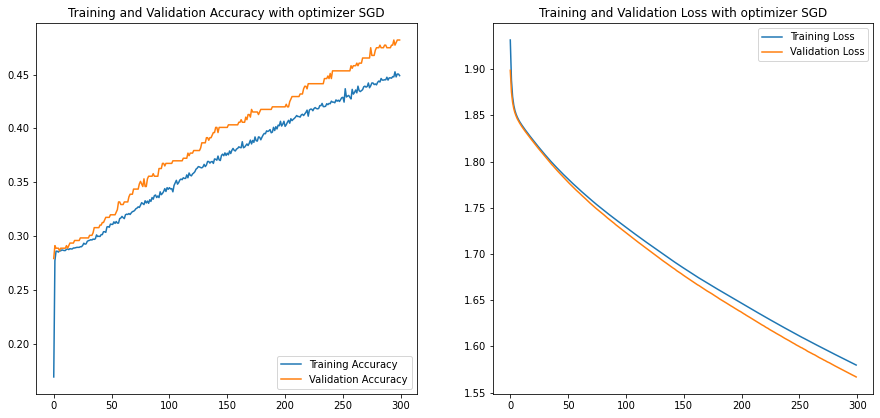

--------test------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


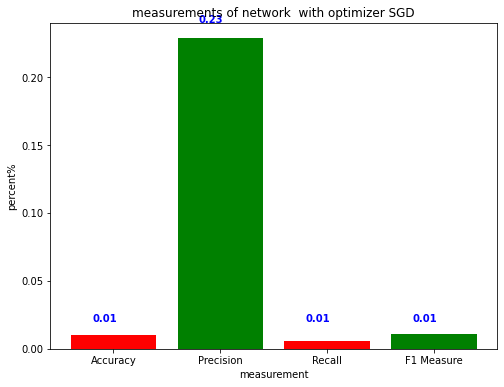

In [ ]:
model=create_model(lr=0.00001,my_optimiezr=keras.optimizers.SGD)
model_history=fit_model(model,epochs_size,batchs_size=btch)
plot_model_acc_loss(model_history,epochs_size,title="with optimizer SGD" )
Y_pred=test_model(model)
test_measures(Y_pred,title=" with optimizer SGD")

(3374, 2304)
(3374, 7)
Epoch 1/300
338/338 [==============================] - 2s 4ms/step - loss: 1.8303 - accuracy: 0.2886 - val_loss: 1.6865 - val_accuracy: 0.3771
Epoch 2/300
338/338 [==============================] - 1s 3ms/step - loss: 1.6776 - accuracy: 0.3969 - val_loss: 1.5833 - val_accuracy: 0.4057
Epoch 3/300
338/338 [==============================] - 1s 3ms/step - loss: 1.5502 - accuracy: 0.4870 - val_loss: 1.5030 - val_accuracy: 0.5346
Epoch 4/300
338/338 [==============================] - 1s 3ms/step - loss: 1.4922 - accuracy: 0.5024 - val_loss: 1.4638 - val_accuracy: 0.5251
Epoch 5/300
338/338 [==============================] - 1s 3ms/step - loss: 1.4537 - accuracy: 0.5275 - val_loss: 1.3846 - val_accuracy: 0.5394
Epoch 6/300
338/338 [==============================] - 1s 3ms/step - loss: 1.3791 - accuracy: 0.5540 - val_loss: 1.3489 - val_accuracy: 0.5609
Epoch 7/300
338/338 [==============================] - 1s 3ms/step - loss: 1.3375 - accuracy: 0.5642 - val_loss: 1.2980

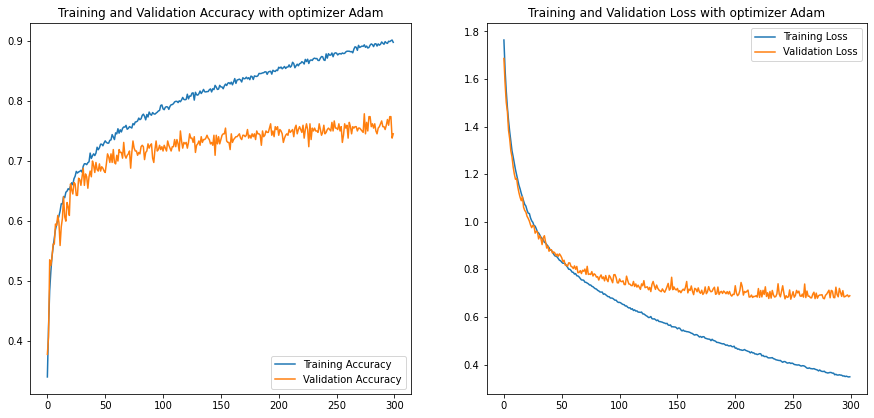

--------test------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


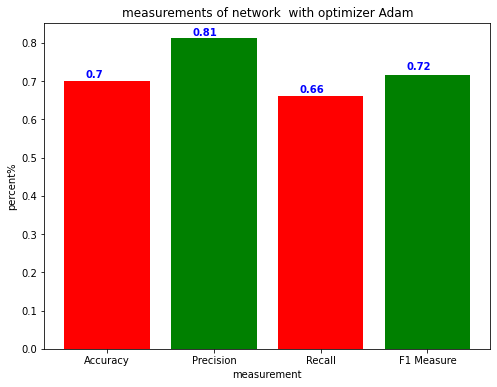

In [ ]:
model=create_model(lr=0.00001,my_optimiezr=keras.optimizers.Adam)
model_history=fit_model(model,epochs_size,batchs_size=btch)
plot_model_acc_loss(model_history,epochs_size,title="with optimizer Adam" )
Y_pred=test_model(model)
test_measures(Y_pred,title=" with optimizer Adam")